In [228]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage import img_as_ubyte

Here we define a decorator for our noise adder function. The reason for using this decorator is to make it easier to plot the output image. With every time we add noise, we plot the original image and the resulting image.

In [229]:
def decorator(fun):
    
    def wrapper(I):
        I_show=cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(I_show)
        out=fun(I)
        plt.figure()
        plt.imshow(out)
        return cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
    return wrapper

In [230]:
@decorator
def gauss(I):
    I=cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    img_n=random_noise(I, mode='gaussian')
    img_out = img_as_ubyte(img_n)
    return img_out

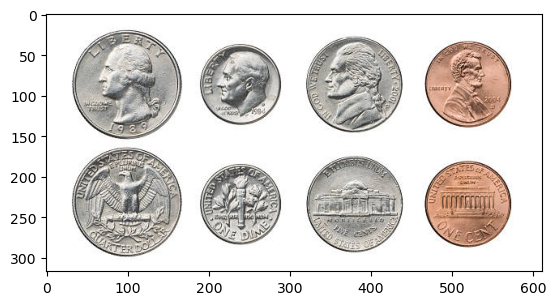

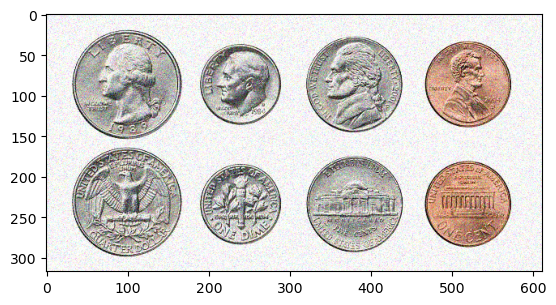

In [231]:
I=cv2.imread("inputs/coins.jpg")
out1=gauss(I)

Here is the implementation of Wiener filter

In [234]:
@decorator
def wiener(I):
    I=cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    K=7
    kernel=np.ones((K,K), dtype=np.float64)
    pad=int((K-1)/2)
    I_copy=cv2.copyMakeBorder(I, bottom=pad, top=pad, right=pad, left=pad, borderType=cv2.BORDER_REPLICATE)
    rows=I.shape[0]
    cols=I.shape[1]
    imgs=[]
    
    if I.shape[-1]==3:
        for k in range(3):
            m=np.zeros(I.shape[0:-1], dtype=np.float64)
            seg2=np.zeros(I.shape[0:-1], dtype=np.float64)
            for i in range(K):
                for j in range(K):
                    m=m+(I_copy[i:i+rows, j:j+cols, k]).astype(np.float64)
                    seg2= seg2+ ((I_copy[i:i+rows, j:j+cols,k]).astype(np.float64))**2
                    
            seg2=seg2/(K**2)
            m=m/(K**2)
            seg2=seg2-m**2
            v=np.sum(seg2)/(rows*cols)
            seg2_nozeros=np.where(seg2==0, 1, seg2)
            f_res=np.where(seg2<v,m,m+((seg2-v)/seg2_nozeros)*(I[...,k]-m))
            imgs.append(f_res.astype(np.uint8))    
    out=cv2.merge(imgs)
    return out

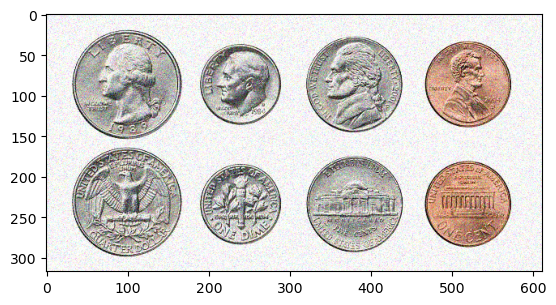

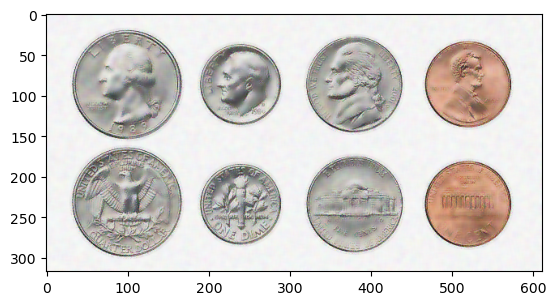

In [235]:
out=wiener(out1)